<a href="https://colab.research.google.com/github/Mostaq27/weather_data-processing/blob/main/weather_data_top100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 1. Imports + read CSV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The uploaded file name (change if different)
df = pd.read_csv('weather_data_top100.csv')

print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

Loaded 851,512 rows × 10 columns


,date,tavg,tmin,tmax,prcp,snow,wspd,pres,country,city
0,1980-01-01,-3.0,-8.0,1.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul
1,1980-01-02,-6.2,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul
2,1980-01-03,-7.7,-14.0,2.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul
3,1980-01-04,-8.4,-15.0,-2.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul
4,1980-01-05,-7.8,-14.0,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul


In [2]:
# 2. Clean & parse dates

# Convert date column (format: YYYY-MM-DD)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Drop rows where date parsing failed (should be none)
df.dropna(subset=['date'], inplace=True)

# Set date as index
df.set_index('date', inplace=True)

# Handle missing values: For numeric columns, fill with NaN or mean, but here we'll keep as is for now
numeric_cols = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Add useful time columns
df['Year']  = df.index.year
df['Month'] = df.index.month
df['Day']   = df.index.day

# Unique countries and cities
print("Unique countries:", df['country'].nunique())
print("Unique cities:", df['city'].nunique())
print("Date range:", df.index.min().date(), "→", df.index.max().date())
df.head()

Unique countries: 86
Unique cities: 86
Date range: 1980-01-01 → 2025-09-01


,tavg,tmin,tmax,prcp,snow,wspd,pres,country,city,Year,Month,Day
date,,,,,,,,,,,,
1980-01-01,-3.0,-8.0,1.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul,1980,1,1
1980-01-02,-6.2,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul,1980,1,2
1980-01-03,-7.7,-14.0,2.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul,1980,1,3
1980-01-04,-8.4,-15.0,-2.0,NaN,NaN,NaN,NaN,Afghanistan,Kabul,1980,1,4
1980-01-05,-7.8,-14.0,NaN,NaN,NaN,NaN,NaN,Afghanistan,Kabul,1980,1,5


In [3]:
# 3. Summary stats

df.describe().round(2)

,tavg,tmin,tmax,prcp,snow,wspd,pres,Year,Month,Day
count,799501.00,716627.00,763377.00,465075.00,40081.00,535406.00,322548.00,851512.00,851512.00,851512.00
mean,18.68,13.50,23.35,2.87,5.81,12.07,1014.24,2004.90,6.49,15.73
std,9.91,9.43,10.70,13.39,13.61,6.78,8.09,13.58,3.44,8.80
min,-38.40,-39.50,-31.30,0.00,0.00,0.00,959.20,1980.00,1.00,1.00
25%,12.60,7.00,16.80,0.00,0.00,7.60,1009.70,1993.00,4.00,8.00
50%,19.90,14.00,24.80,0.00,0.00,10.70,1013.90,2006.00,6.00,16.00
75%,26.70,21.00,31.50,1.20,6.00,14.90,1019.00,2017.00,9.00,23.00
max,43.30,39.00,62.00,778.00,310.00,88.20,1057.70,2025.00,12.00,31.00


In [4]:
# 4. Yearly aggregates (averaged over all cities)

# Group by Year and compute mean tavg, sum prcp (note: prcp has many NaNs)
yearly = df.groupby('Year').agg(
    Avg_Temp = ('tavg', 'mean'),
    Total_Precip = ('prcp', 'sum')  # Sum may be underestimate due to NaNs
).reset_index()

# Also, per country example (e.g., average temp per year per country)
yearly_per_country = df.groupby(['Year', 'country'])['tavg'].mean().reset_index()

yearly.head()

,Year,Avg_Temp,Total_Precip
0,1980,16.925685,26348.3
1,1981,17.079854,27598.7
2,1982,17.102816,22057.7
3,1983,17.761609,21805.4
4,1984,16.867487,21146.7


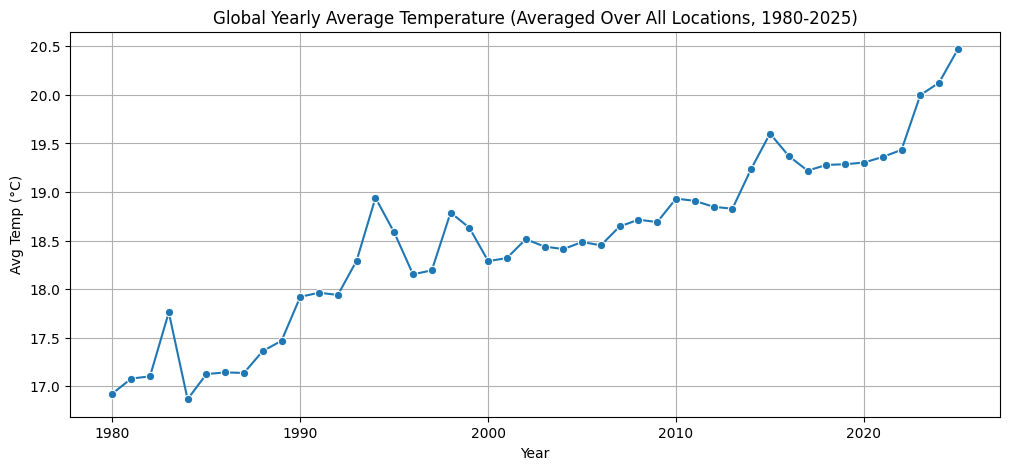

In [5]:
# 5. Plot - Global Yearly Average Temperature (Line, averaged over all locations)

plt.figure(figsize=(12,5))
sns.lineplot(data=yearly, x='Year', y='Avg_Temp', marker='o')
plt.title('Global Yearly Average Temperature (Averaged Over All Locations, 1980-2025)')
plt.ylabel('Avg Temp (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

/tmp/ipython-input-1705717042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x='Year', y='Total_Precip', palette='Blues_d')


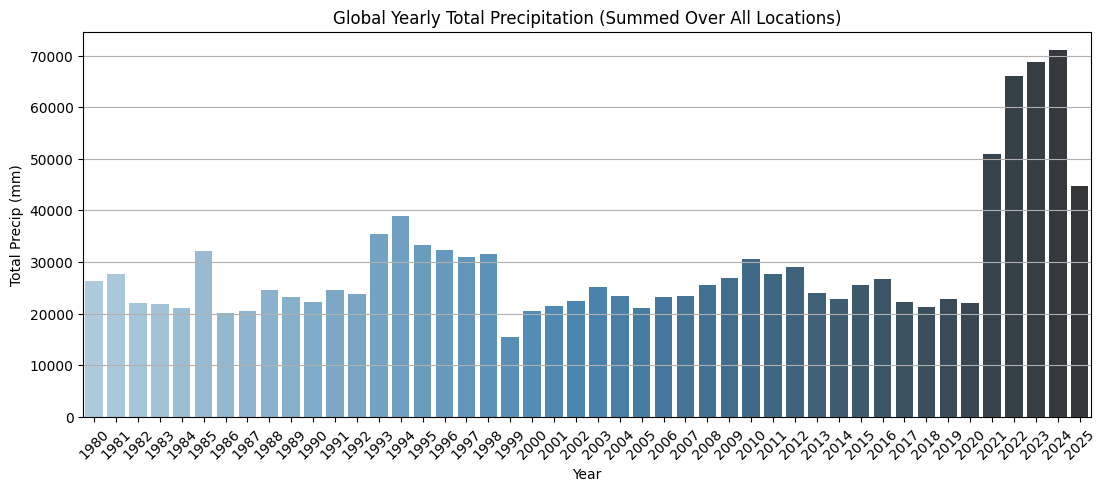

In [6]:
# 6. Plot - Yearly Total Precipitation (Bar, summed over all locations)

plt.figure(figsize=(13,5))
sns.barplot(data=yearly, x='Year', y='Total_Precip', palette='Blues_d')
plt.title('Global Yearly Total Precipitation (Summed Over All Locations)')
plt.ylabel('Total Precip (mm)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-2688518653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.reset_index(), x='Month', y='tavg', palette='coolwarm')


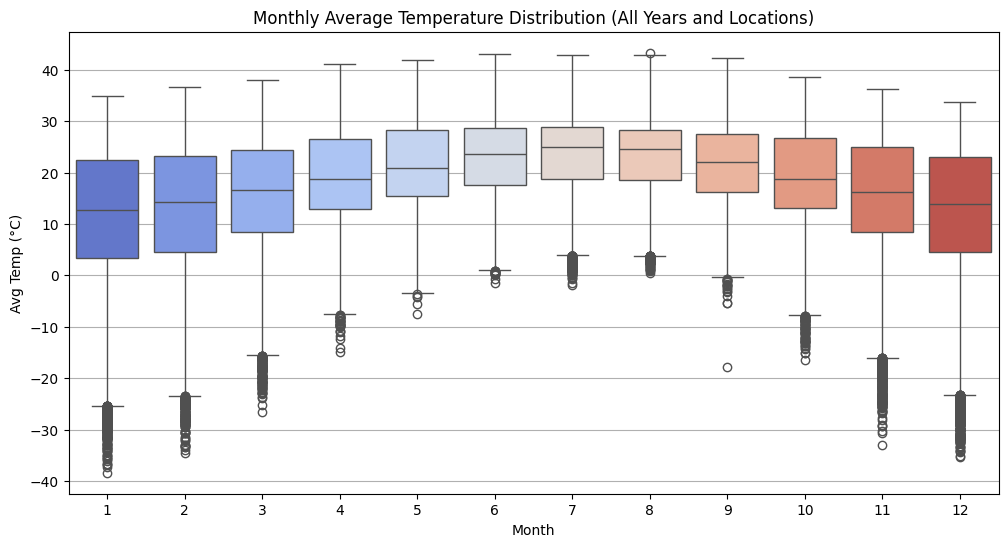

In [8]:
# 7. Monthly Temperature Distribution (Boxplot, all years and locations)

plt.figure(figsize=(12,6))
# Reset the index before creating the boxplot
sns.boxplot(data=df.reset_index(), x='Month', y='tavg', palette='coolwarm')
plt.title('Monthly Average Temperature Distribution (All Years and Locations)')
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.grid(axis='y')
plt.show()

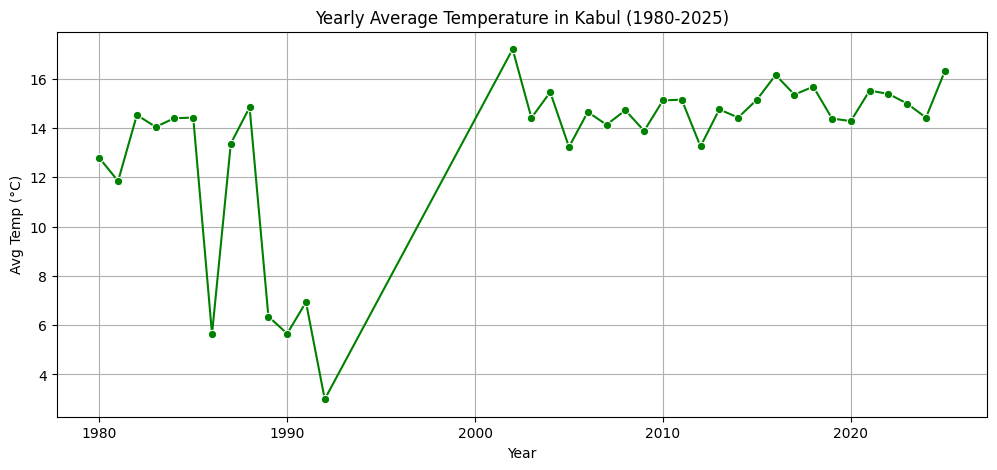

In [9]:
# 8. Example: Temperature Trend for a Specific City (e.g., Kabul)

city_df = df[df['city'] == 'Kabul']  # Change city name as needed
city_yearly = city_df.groupby('Year')['tavg'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=city_yearly, x='Year', y='tavg', marker='o', color='green')
plt.title('Yearly Average Temperature in Kabul (1980-2025)')
plt.ylabel('Avg Temp (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

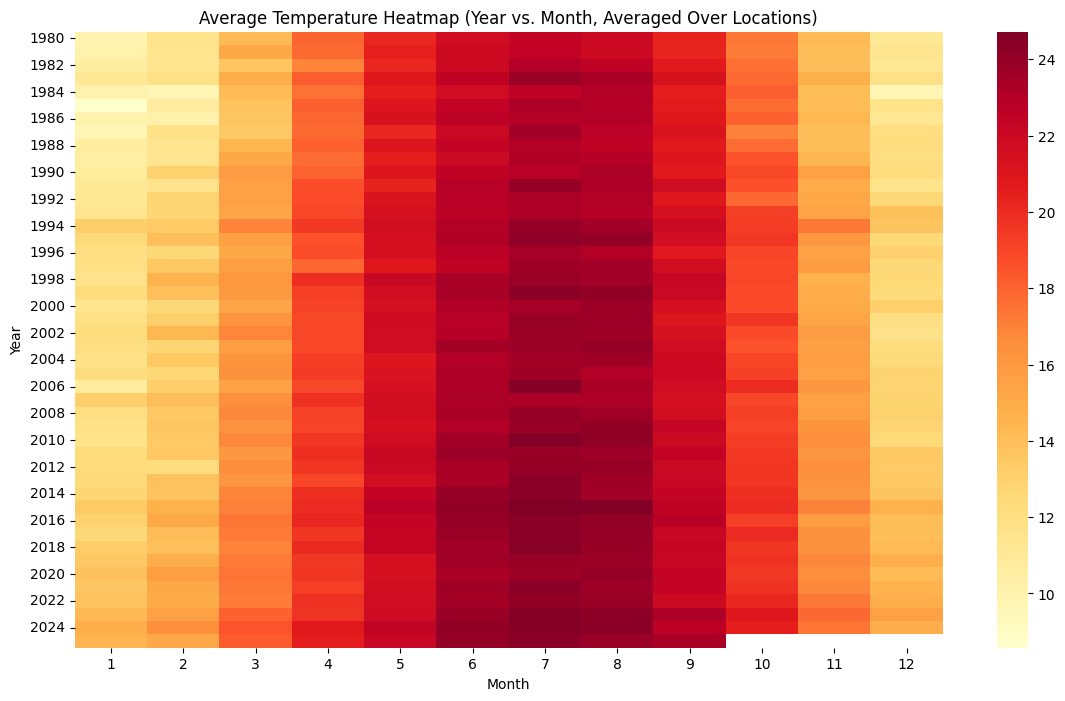

In [10]:
# 9. Heatmap: Average Temperature by Year and Month (Averaged over locations)

monthly_yearly = df.groupby(['Year', 'Month'])['tavg'].mean().unstack()

plt.figure(figsize=(14,8))
sns.heatmap(monthly_yearly, cmap='YlOrRd', annot=False)
plt.title('Average Temperature Heatmap (Year vs. Month, Averaged Over Locations)')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

In [12]:
# 10. (Optional) Save Processed Data
from google.colab import files

df.to_csv('weather_data_top100_cleaned.csv')
files.download('weather_data_top100_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>